# BEE 4750 Lab 1: Julia and GitHub Basics

**Name**: Peter Thais

**ID**: pdt35

> **Due Date**
>
> Wednesday, 8/28/24, 9:00pm

## Setup

The following code should go at the top of most Julia scripts; it will
load the local package environment and install any needed packages. You
will see this often and shouldn’t need to touch it.

In [15]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()
Pkg.resolve()

  Activating project at `c:\Users\peter\BEE4750\labs\lab01`
   Installed Pango_jll ─ v1.54.0+0
  No Changes to `C:\Users\peter\BEE4750\labs\lab01\Project.toml`
    Updating `C:\Users\peter\BEE4750\labs\lab01\Manifest.toml`
  [d360d2e6] + ChainRulesCore v1.24.0
  [9e997f8a] + ChangesOfVariables v0.1.9
  [187b0558] + ConstructionBase v1.5.7
  [3587e190] + InverseFunctions v0.1.16
  [ee1fde0b] + Dbus_jll v1.14.10+0
  [0656b61e] ↑ GLFW_jll v3.4.0+0 ⇒ v3.4.0+1
⌃ [36c8627f] + Pango_jll v1.54.0+0
  [1183f4f0] + libdecor_jll v0.2.2+0
  [f27f6e37] ↑ libvorbis_jll v1.3.7+1 ⇒ v1.3.7+2
  [8bb1440f] ~ DelimitedFiles v1.9.1 ⇒ 
  [b27032c2] ↓ LibCURL v0.6.4 ⇒ v0.6.3
  [44cfe95a] ↓ Pkg v1.10.0 ⇒ v1.8.0
  [2f01184e] ~ SparseArrays v1.10.0 ⇒ 
  [10745b16] ~ Statistics v1.10.0 ⇒ 
  [fa267f1f] ↓ TOML v1.0.3 ⇒ v1.0.0
  [a4e569a6] ↑ Tar v1.10.0 ⇒ v1.10.1
  [e66e0078] ↓ CompilerSupportLibraries_jll v1.1.1+0 ⇒ v1.0.1+0
  [deac9b47] ↓ LibCURL_jll v8.4.0+0 ⇒ v7.84.0+0
  [e37daf67] - LibGit2_jll v1.6.4+0
  [2981

This next cell loads packages which are required for the rest of the
code evaluation. In this case, we only need to load the `Plots.jl`
plotting package, but you will see others over the course of the
semester (and can add more if desired; just make sure that you’ve [added
the new packages to the
environment](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management)).
Standard Julia practice is to load all of the needed packages at the top
of the file.

> **Warning**
>
> Loading packages can take a while, especially the first time! Julia
> tries to precompile all of the packages you’re using so repeat use is
> faster, but this can be quite slow at first.

In [16]:
using Plots

## Introduction

### Julia

Julia is an up-and-coming language, originally developed for scientific
programming. While learning a new programming language always has its
hiccups, the good news is that if you’ve programmed in a high-level
language such as Python or MATLAB, most Julia concepts should look
familiar.

If you have not successfully set up Julia, follow the instructions in
[Tools
Setup](https://viveks.me/environmental-systems-analysis/setup.html)
and/or ask for help.

You can use other editors for this course, but our recommendation is
[Visual Studio Code](https://code.visualstudio.com/) with the [Julia
extension](https://marketplace.visualstudio.com/items?itemName=julialang.language-julia),
which will make life a *lot* simpler! You should have set this up by
following the [Tools
Setup](https://viveks.me/environmental-systems-analysis/setup.html)
instructions, but if not, do so now and/or ask for help.

### Jupyter Notebooks

Jupyter notebooks integrate text and equations in Markdown with Julia
(or Python, or R) code. To do this, Jupyter notebooks consist of two
types of “cells”: code cells and Markdown (text) cells.

Click once on this section of text. A box will appear around this text
(and some areas above/below it) - all of that is within this cell.

Markdown is a text markup framework for formatting language that makes
things look pretty when viewed across different platforms: web browsers,
notebooks, and so forth. Text written in Markdown can also include
hyperlinks, LaTeX equations, section headers, and images, among other
features (most of [the course
website](https://viveks.me/climate-risk-analysis) and the lecture notes
were all written in Markdown!). [Here is a basic Markdown cheat
sheet](https://www.markdownguide.org/cheat-sheet/).

What you are looking at right now is the formatted text after the
Markdown is processed. To see the raw Markdown, do one of:

-   press `Enter` while that cell is selected, or
-   double-click on that cell.

------------------------------------------------------------------------

A couple of the features you will see in this Markdown cell:

-   The `---` command creates a horizontal line. This is also nice for
    separating sections.
-   Backticks (`` `...` ``) can be used to format and highlight code,
    keystrokes, etc.
-   The `#` sign is used to create a new section header; two `#` signs
    (`##`) is used to create a new subsection header; `###` creates a
    subsubsection, and so on.
-   You can create a bulleted list by using the asterisk `*` or a dash
    `-` and a space.
-   You can create regular text by just typing as usual.
-   You can create **bold-faced text** by wrapping it with two asterisks
    on both sides.
-   You can create *italicized text* by wrapping it with a single
    asterisk on both sides.
-   To create a new paragraph, you must include a blank line between the
    old and new paragraphs.

At this point you might be wondering how to turn this cell back into the
fully formatted Markdown text instead of the raw Markdown you’re
probably still looking at. You have a couple of options, depending on
your platform, but the most consistent is to type `Shift + Enter` to
**execute** the cell (this is also how to run code, but more on that
later).

Additionally, you will frequently need to create new cells in your
Jupyter notebooks. How you do this will depend on how you interact with
the notebook, but try to figure this out now.

One tip is to think carefully about what bits of code should be in the
same cell, as you typically only see output from the last command in a
cell. For example, compare the following:

In [17]:
x = 5
sin(x)

-0.9589242746631385

with

In [18]:
x = 5

5

In [19]:
sin(x)

-0.9589242746631385

In Julia, you can also suppress the output of a command with a
semi-colon:

In [20]:
sin(x);

which can help if you want to split some code out for clarity or to
insert some text prior to it, but don’t want to clutter the notebook
with its output.

For code cells, to execute the commands within the cell, we also press
`Shift+Enter`.

Finally, **make sure that you evaluate all of the code cells in order
before submitting**. One bad outcome with notebooks occurs when cells
are evaluated out of order, so fixed bugs and edits in previous cells do
not get a chance to propagate down. You can do this with the `Run All`
command in whichever interface you’re using to edit your notebook.

### Julia Basics

There are many tutorials and references for Julia, including a [basics
overview on the class website](../tutorials/julia-basics.html). Please
feel free to reference these as you work through any part of the course.

### Formatting Math

It will often be helpful to include nicely-formatted mathematics in a
notebook. Markdown accomodates this using LaTeX syntax. A LaTeX
cheatsheet is available on the class website, and many other guides
exist online.

Below is an example of a formatted equation: $$x = 5.$$

### Looking For Help

There is no shame in using Google, or other resources, for help when
programming. There are many, many times when you can’t quite get the
syntax to work, can’t quite figure out the right package or command to
use, or are feeling too lazy or overwhelmed (I’m not judging either of
those!) to dig through the documentation. Some good resources include:

-   [Stack Overflow](https://stackoverflow.com/) is a treasure trove of
    answers;
-   The [official Julia forum](https://discourse.julialang.org/) and the
    [Julia Subreddit](https://www.reddit.com/r/Julia/) are also very
    useful.

You are also highly encouraged to post on [Ed
Discussion](https://us.edstem.org), though getting a response might be
less immediate. Just be mindful that to get good answers, [you have to
help people help you](https://stackoverflow.com/help/how-to-ask), and
**make sure to give credit to any resources that were helpful**!

## Exercises (3 points)

Use your understanding of Julia syntax and the GitHub workflow to
complete the following (hopefully short) exercises. Convert your
completed lab assignment to a PDF and submit it to the Gradescope
Assignment “Lab 1”.

**Remember to**:

-   Include a (succint but clear) writeup of the core idea underlying
    your code, through some combination of equations, text, and
    algorithms. As you are not required to submit your code, we will not
    be looking at it in detail, and instead will rely on those writeups
    to assess whether your approach is correct.
-   If using the notebook, evaluate all of your code cells, in order
    (using a `Run All` command). This will make sure all output is
    visible and that the code cells were evaluated in the correct order.
-   Tag each of the problems when you submit to Gradescope; a 10%
    penalty will be deducted if this is not done.

### Computing a Dot Product

Given two numeric arrays `x` and `y`, write a function to compute their
dot product if they have equal length, and return an error if not (this
is useful for debugging!). Use the following code as a starting point.

In [21]:
function dot_product(x, y)
    if length(x) == length(y) # insert test condition for equal lengths
        return sum(x .* y) # compute and return dot product
    else 
        throw(DimensionMismatch("length of x not equal to length of y"))
    end
end

dot_product (generic function with 1 method)

### Code Explanation
For my function, I used the if statement to ensure that the numeric arrays were of equal length. If they were, I used the .* operation to multiply each element in the ray and summed up the total.

Here are some tests to make sure your code works as intended. Tests like
these are useful to make sure everything works as intended. One reason
to split your code up into functions is that it makes it straightforward
to write tests to make sure each piece of your code works, which makes
it easier to identify where errors are occuring.

In [22]:
dot_product([1 2 3], [4 5 6])

32

If you know the value you should get, you can write a more formal test
using the `@assert` macro, which is a good way to “automate” checking
(since you get an obvious error if the code doesn’t work as desired):

In [23]:
@assert dot_product([1 2 3], [4 5 6]) == 32

Let’s also make sure we get an error when the dimensions of the two
vectors don’t match:

In [24]:
dot_product([1 2 3], [4 5])

DimensionMismatch: DimensionMismatch: length of x not equal to length of y

### Making a Plot

Write a function to compute the square of an integer `x`. Evaluate this
function for integers between $x=-5$ and $x=5$ and make a plot of the
squared values (you can find a quick guide to making various types of
plots
[here](https://viveks.me/environmental-systems-analysis/tutorials/julia-plots.html)).
Make sure to label your axes.

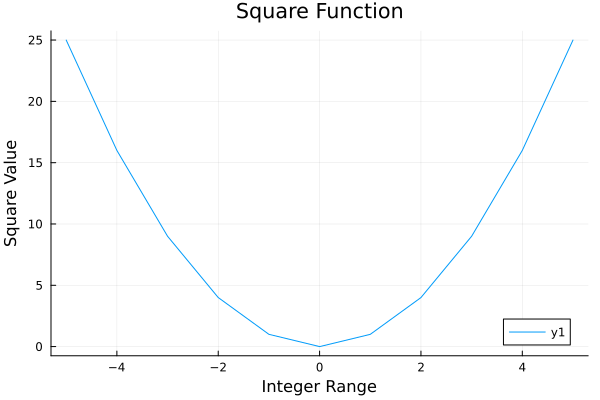

In [25]:
# insert your code here
function square(x)
    return x*x
end

x=[-5:5]
y=[]
for i in -5:5
    push!(y,square(i))
end

plot(x, y, xlabel="Integer Range", ylabel="Square Value", title="Square Function")

### Code Explanation
I wrote a function called square that takes the square of the input variable by multiplying it by itself. Then, I made an array for both the x and y values of the graph I will be plotting using a for loop and the square function. Then, I plotted the graph using "Tutorial: Making Plots with Julia."

## Commit and Push Your Changes to GitHub

After completing the previous two exercises, commit your solution file
(notebook or otherwise) and push to GitHub. Use an informative commit
message which makes it clear what changes you’ve made. The specific
workflow for this will vary depending on how you’re writing up your
solutions; please search for specifics and ask for help as needed!

> **Useful Commit Sizes**
>
> Ideally, you’d commit whenever you make a “substantial” enough change
> that you want to lock in, such as writing the core code for a problem
> or completing a problem, if you’re preparing code to be used elsewhere
> (by yourself or others), or if you want to ask for help. `git` lets
> you revert changes back to a previous commit, so it’s easy to undo
> changes or updates which broke something that was previously working,
> so changing too many things at once can make it hard to keep track of
> what worked when.
>
> But in this case, go ahead and just commit after finishing the
> problems.

Push the repository with these commits to GitHub and take a screenshot
of the repository page
(`https://github.com/BEE4750-FA24/<username>/lab01`) which shows the
updated repository. Include that screenshot in your submission as the
solution to this problem.

## Submitting PDF

> **Important**
>
> These submission instructions will not be repeated on future
> assignments!

Export your writeup as a PDF and submit it to the “Lab 1” assignment on
Gradescope. Make sure that you tag pages corresponding to relevant
problems to avoid a 10% penalty.

> **Printing Code to PDF**
>
> You are not required to submit your code when submitting assignments.
> However, when printing a notebook to PDF, long lines will run off the
> edge of code cells, which may result in comments or code being hidden.
> If you see this, go back to the notebook and break up long lines into
> shorter onces (for example, see the comment in the above code cell) to
> ensure key parts of your results aren’t missing.